https://pysolar.readthedocs.io/en/latest/#location-calculation

In [1]:
import inspect
from importlib import reload

In [2]:
import numpy as N
import matplotlib
import matplotlib.pyplot as M
import matplotlib.ticker as ticker

In [3]:
matplotlib.rcParams['figure.figsize'] = [6,6]
matplotlib.rcParams.update({'font.size': 16})
pngdpi=150

In [5]:
import analemma as A

In [6]:
reload(A)

<module 'analemma' from '/Users/apope/Dropbox/Python/analemma/apope/analemma.py'>

In [7]:
print(inspect.getsource(A))

import pysolar.solar as PS
import datetime as DT
import numpy as N

class Analemma:
    def __init__(self, latitude=41.1190631, longitude=-83.2225659, offsetHoursUTC=-5.0, year=2021):
        # defaults to EST in Tiffin, OH, USA for 2021
        self.lat = latitude
        self.lon = longitude
        hour = DT.timedelta(hours=1.0)
        self.td = offsetHoursUTC*hour
        self.dayZero = DT.datetime(year, 1, 1, tzinfo=DT.timezone.utc)
        
    def getTimeFromLocal(self, dayOfYear, localStandardTimeHours24):
        # generate UTC datetime object from local day and time
        # day is meant to be integer, should check that
        # local time is floating point
        day = DT.timedelta(days=1)
        hour = DT.timedelta(hours=1)
        time = self.dayZero + int(dayOfYear)*day + localStandardTimeHours24*hour - self.td
        return time
    
    def getAltAz(self, dayOfYear, localStandardTimeHours24):
        # (alt, az) tuple from scalar local day and time
        time = 

Instantiate Analemma object for Tiffin, OH, USA, in Eastern Standard Time for 2021

In [8]:
a = A.Analemma()
print(a.dayZero)

2021-01-01 00:00:00+00:00


Dad's request for 10am EST.

/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \


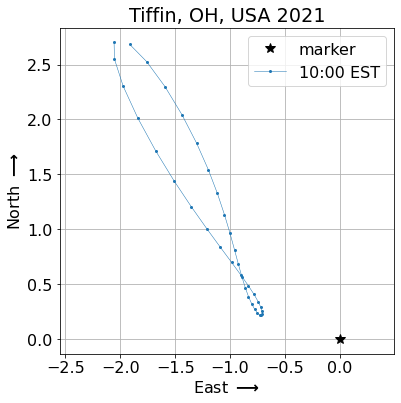

In [9]:
matplotlib.rcParams['figure.figsize'] = [6,6]
#
start = 0
stop = 355
incr = 10
timelist = [10]
#
ms = 2
lw = 0.5
mms = 10
ticks=0.5
#
M.plot(0,0,'*k',label='marker',markersize=mms)
for tod in timelist:
    times = a.fixedTime(tod,range(start,stop,incr))
    east,north = a.shadowGroundEastNorth(a.getAltitudes(times),a.getAzimuths(times))
    hm = '%d:%02d EST'%(int(tod),round((tod - int(tod))*60))
    M.plot(east,north,'-o',markersize=ms,linewidth=lw,label=hm)
M.xlabel(r'East ${\bf \longrightarrow}$')
M.ylabel(r'North ${\bf \longrightarrow}$')
M.grid(True)
ax = M.gca()
ax.set_aspect('equal', 'datalim')
ax.xaxis.set_major_locator(ticker.MultipleLocator(ticks))
ax.yaxis.set_major_locator(ticker.MultipleLocator(ticks))
M.legend()
M.title('Tiffin, OH, USA %d'%a.dayZero.year)
M.savefig('Analemma_TiffinOH_%d_10EST.pdf'%a.dayZero.year);
M.show();

Dad's request for 9am-4pm hourly EST.

/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I do

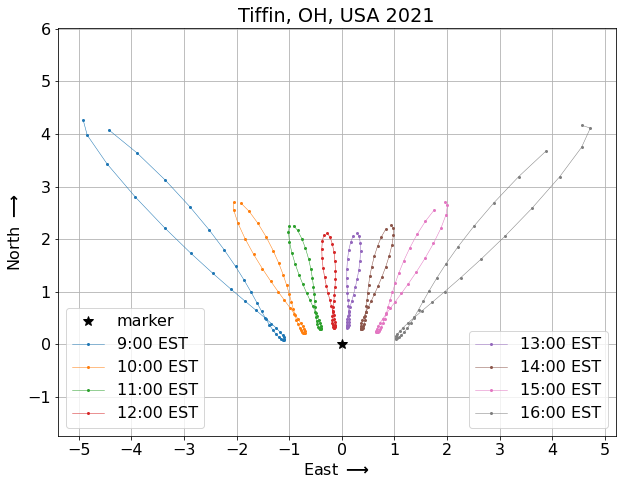

In [10]:
matplotlib.rcParams['figure.figsize'] = [10,7.5]
start = 0
stop = 355
incr = 10
timelist = [9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0]
#
ms = 2
lw = 0.5
mms = 10
ticks = 1.0
#
handles = []
h, = M.plot(0,0,'*k',label='marker',markersize=mms)
handles.append(h)
for tod in timelist:
    times = a.fixedTime(tod,range(start,stop,incr))
    east,north = a.shadowGroundEastNorth(a.getAltitudes(times),a.getAzimuths(times))
    hm = '%d:%02d EST'%(int(tod),round((tod - int(tod))*60))
    h, = M.plot(east,north,'-o',markersize=ms,linewidth=lw,label=hm)
    handles.append(h)
M.xlabel(r'East ${\bf \longrightarrow}$')
M.ylabel(r'North ${\bf \longrightarrow}$')
M.grid(True);
ax = M.gca();
ax.set_aspect('equal', 'datalim')
ax.xaxis.set_major_locator(ticker.MultipleLocator(ticks))
ax.yaxis.set_major_locator(ticker.MultipleLocator(ticks))
s = len(handles)//2+1
l1 = M.legend(handles=handles[0:s],loc='lower left')
M.gca().add_artist(l1)
M.legend(handles=handles[s:],loc='lower right')
M.title('Tiffin, OH, USA %d'%a.dayZero.year)
M.savefig('Analemma_TiffinOH_%d_9-16EST.pdf'%a.dayZero.year);
M.show();

Checking for intersections with 30min spacing around midday.

/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I do

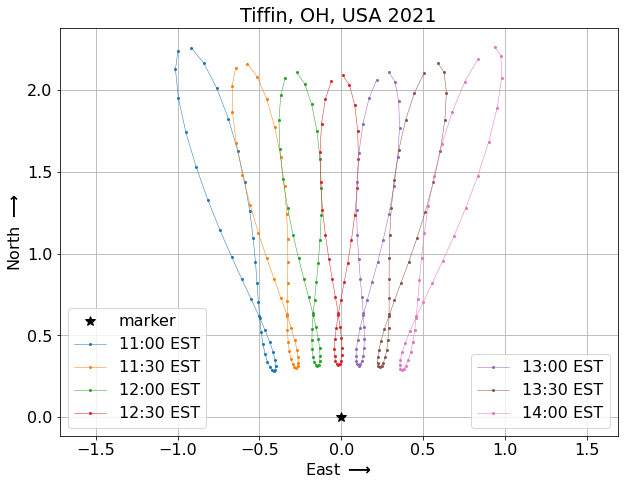

In [11]:
matplotlib.rcParams['figure.figsize'] = [10,7.5]
start = 0
stop = 355
incr = 10
timelist = [11,11.5,12,12.5,13,13.5,14]
#
ms = 2
lw = 0.5
mms = 10
ticks = 0.5
#
handles = []
h, = M.plot(0,0,'*k',label='marker',markersize=mms)
handles.append(h)
for tod in timelist:
    times = a.fixedTime(tod,range(start,stop,incr))
    east,north = a.shadowGroundEastNorth(a.getAltitudes(times),a.getAzimuths(times))
    hm = '%d:%02d EST'%(int(tod),round((tod - int(tod))*60))
    h, = M.plot(east,north,'-o',markersize=ms,linewidth=lw,label=hm)
    handles.append(h)
M.xlabel(r'East ${\bf \longrightarrow}$')
M.ylabel(r'North ${\bf \longrightarrow}$')
M.grid(True);
ax = M.gca();
ax.set_aspect('equal', 'datalim')
ax.xaxis.set_major_locator(ticker.MultipleLocator(ticks))
ax.yaxis.set_major_locator(ticker.MultipleLocator(ticks))
s = len(handles)//2+1
l1 = M.legend(handles=handles[0:s],loc='lower left')
M.gca().add_artist(l1)
M.legend(handles=handles[s:],loc='lower right')
M.title('Tiffin, OH, USA %d'%a.dayZero.year)
M.savefig('Analemma_TiffinOH_%d_11-14EST_30min.pdf'%a.dayZero.year);
M.show();

Dad's request for just 10am to 3pm hourly EST.

/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \


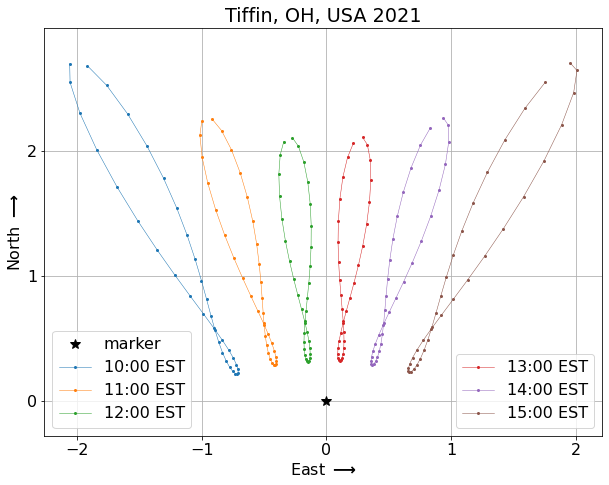

In [12]:
matplotlib.rcParams['figure.figsize'] = [10,7.5]
start = 0
stop = 355
incr = 10
timelist = [10.0,11.0,12.0,13.0,14.0,15.0]
#
ms = 2
lw = 0.5
mms = 10
ticks = 1.0
#
handles = []
h, = M.plot(0,0,'*k',label='marker',markersize=mms)
handles.append(h)
for tod in timelist:
    times = a.fixedTime(tod,range(start,stop,incr))
    east,north = a.shadowGroundEastNorth(a.getAltitudes(times),a.getAzimuths(times))
    hm = '%d:%02d EST'%(int(tod),round((tod - int(tod))*60))
    h, = M.plot(east,north,'-o',markersize=ms,linewidth=lw,label=hm)
    handles.append(h)
M.xlabel(r'East ${\bf \longrightarrow}$')
M.ylabel(r'North ${\bf \longrightarrow}$')
M.grid(True);
ax = M.gca();
ax.set_aspect('equal', 'datalim')
ax.xaxis.set_major_locator(ticker.MultipleLocator(ticks))
ax.yaxis.set_major_locator(ticker.MultipleLocator(ticks))
s = len(handles)//2+1
l1 = M.legend(handles=handles[0:s],loc='lower left')
M.gca().add_artist(l1)
M.legend(handles=handles[s:],loc='lower right')
M.title('Tiffin, OH, USA %d'%a.dayZero.year)
M.savefig('Analemma_TiffinOH_%d_10-15EST.pdf'%a.dayZero.year);
M.show();

/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \


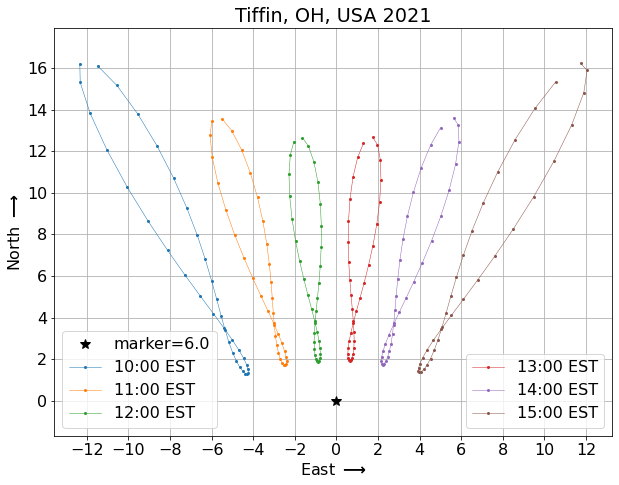

In [15]:
matplotlib.rcParams['figure.figsize'] = [10,7.5]
#
height = 6.0
#
start = 0
stop = 355
incr = 10
timelist = [10.0,11.0,12.0,13.0,14.0,15.0]
#
ms = 2
lw = 0.5
mms = 10
ticks = 2.0
#
handles = []
h, = M.plot(0,0,'*k',label='marker=%.1f'%height,markersize=mms)
handles.append(h)
for tod in timelist:
    times = a.fixedTime(tod,range(start,stop,incr))
    east,north = a.shadowGroundEastNorth(a.getAltitudes(times),a.getAzimuths(times),height)
    hm = '%d:%02d EST'%(int(tod),round((tod - int(tod))*60))
    h, = M.plot(east,north,'-o',markersize=ms,linewidth=lw,label=hm)
    handles.append(h)
M.xlabel(r'East ${\bf \longrightarrow}$')
M.ylabel(r'North ${\bf \longrightarrow}$')
M.grid(True);
ax = M.gca();
ax.set_aspect('equal', 'datalim')
ax.xaxis.set_major_locator(ticker.MultipleLocator(ticks))
ax.yaxis.set_major_locator(ticker.MultipleLocator(ticks))
s = len(handles)//2+1
l1 = M.legend(handles=handles[0:s],loc='lower left')
M.gca().add_artist(l1)
M.legend(handles=handles[s:],loc='lower right')
M.title('Tiffin, OH, USA %d'%a.dayZero.year)
M.savefig('Analemma_TiffinOH_%d_10-15EST_6height.pdf'%a.dayZero.year);
M.show();

/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I don't know about leap seconds after 2020
  warnings.warn \
/Users/apope/anaconda3/lib/python3.8/site-packages/pysolar/solartime.py:110: UserWarning: I do

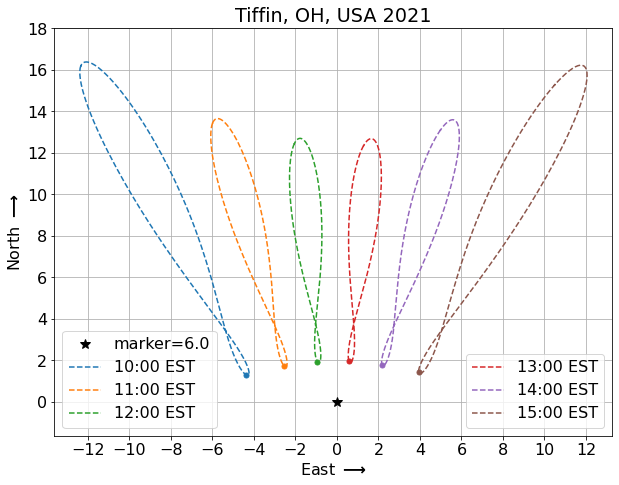

In [55]:
matplotlib.rcParams['figure.figsize'] = [10,7.5]
#
height = 6.0
#
start = 0
stop = 367
incr = 2
timelist = [10.0,11.0,12.0,13.0,14.0,15.0]
#
ms = 5
lw = 1.5
mms = 10
ticks = 2.0
#
handles = []
h, = M.plot(0,0,'*k',label='marker=%.1f'%height,markersize=mms)
handles.append(h)
for tod in timelist:
    times = a.fixedTime(tod,range(start,stop,incr))
    east,north = a.shadowGroundEastNorth(a.getAltitudes(times),a.getAzimuths(times),height)
    hm = '%d:%02d EST'%(int(tod),round((tod - int(tod))*60))
    h, = M.plot(east,north,'--',linewidth=lw,label=hm)
    handles.append(h)    
M.gca().set_prop_cycle(None)
for tod in timelist:
    times = a.fixedTime(tod,[182])
    east,north = a.shadowGroundEastNorth(a.getAltitudes(times),a.getAzimuths(times),height)
    M.plot(east,north,'o',markersize=ms)
M.xlabel(r'East ${\bf \longrightarrow}$')
M.ylabel(r'North ${\bf \longrightarrow}$')
M.grid(True);
ax = M.gca();
ax.set_aspect('equal', 'datalim')
ax.xaxis.set_major_locator(ticker.MultipleLocator(ticks))
ax.yaxis.set_major_locator(ticker.MultipleLocator(ticks))
s = len(handles)//2+1
l1 = M.legend(handles=handles[0:s],loc='lower left')
M.gca().add_artist(l1)
M.legend(handles=handles[s:],loc='lower right')
M.title('Tiffin, OH, USA %d'%a.dayZero.year)
M.savefig('Birthday_Analemma_TiffinOH_%d.jpg'%a.dayZero.year,dpi=72);
M.show();